In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#scripts
import sys
import os

# Add the scripts folder to Python path
sys.path.append(os.path.abspath('../scripts'))

# Now import your scripts
from ddm import simulate_ddm
from stroop_drift import stroop_drift

In [2]:
def run_condition(n_trials, color_signal, word_signal, color_weight, word_weight):
    rts = []
    errors = 0
    for _ in range(n_trials):
        drift = stroop_drift(color_signal, word_signal, color_weight, word_weight)
        rt, decision = ddm(drift)
        rts.append(rt)
        if decision != color_signal:
            errors += 1
    return np.array(rts), errors / n_trials

In [3]:
def run_condition(n_trials, color_signal, word_signal, color_weight, word_weight):
    """
    Run multiple trials for one Stroop condition.
    
    Returns:
        rts: array of reaction times
        error_rate: proportion of incorrect decisions
    """
    rts = []
    errors = 0
    for _ in range(n_trials):
        drift = stroop_drift(color_signal, word_signal, color_weight, word_weight)
        rt, decision = simulate_ddm(drift)
        rts.append(rt)
        if decision != color_signal:
            errors += 1
    return np.array(rts), errors / n_trials


In [4]:
# Simulation parameters
n_trials = 500
word_weights = [1.0, 0.5, 0.2]  # higher = more interference

# Store results
results = {}

for w in word_weights:
    # Congruent trial
    rt_cong, err_cong = run_condition(n_trials, color_signal=1, word_signal=1, color_weight=1.0, word_weight=w)
    
    # Incongruent trial
    rt_incong, err_incong = run_condition(n_trials, color_signal=1, word_signal=-1, color_weight=1.0, word_weight=w)
    
    # Save results
    results[w] = {
        "rt_cong": rt_cong,
        "rt_incong": rt_incong,
        "err_cong": err_cong,
        "err_incong": err_incong
    }

# Print summary
for w, res in results.items():
    print(f"Word weight: {w}")
    print(f"  Congruent RT mean: {res['rt_cong'].mean():.3f}s, error rate: {res['err_cong']:.2f}")
    print(f"  Incongruent RT mean: {res['rt_incong'].mean():.3f}s, error rate: {res['err_incong']:.2f}")


Word weight: 1.0
  Congruent RT mean: 0.405s, error rate: 0.00
  Incongruent RT mean: 2.345s, error rate: 0.59
Word weight: 0.5
  Congruent RT mean: 0.535s, error rate: 0.00
  Incongruent RT mean: 1.435s, error rate: 0.04
Word weight: 0.2
  Congruent RT mean: 0.674s, error rate: 0.00
  Incongruent RT mean: 0.997s, error rate: 0.01


In [5]:
all_data = []
for w, res in results.items():
    for rt in res["rt_cong"]:
        all_data.append({"word_weight": w, "condition": "congruent", "rt": rt})
    for rt in res["rt_incong"]:
        all_data.append({"word_weight": w, "condition": "incongruent", "rt": rt})

df_all = pd.DataFrame(all_data)
df_all.to_csv('../data/stroop_all_results.csv', index=False)
print("Simulation results saved to data/stroop_all_results.csv")

Simulation results saved to data/stroop_all_results.csv


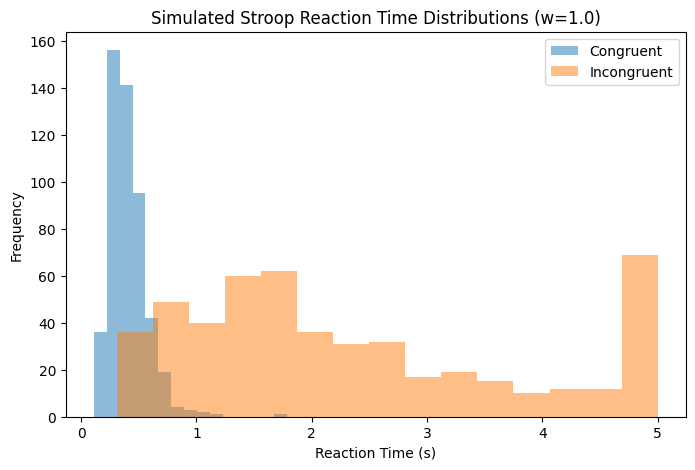

Plot saved to figures/rt_distributions_w1.0.png


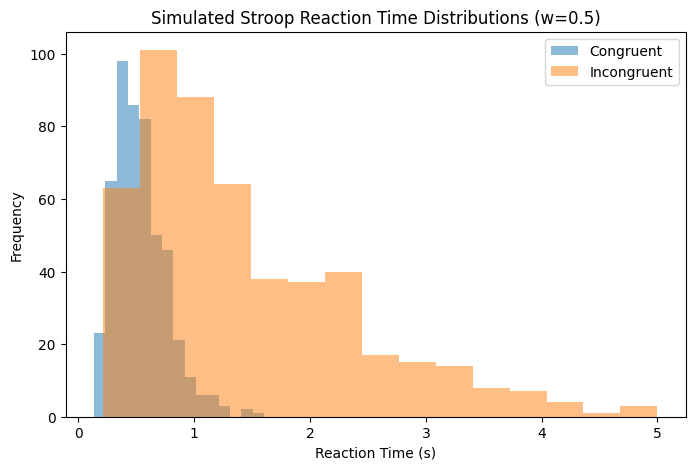

Plot saved to figures/rt_distributions_w0.5.png


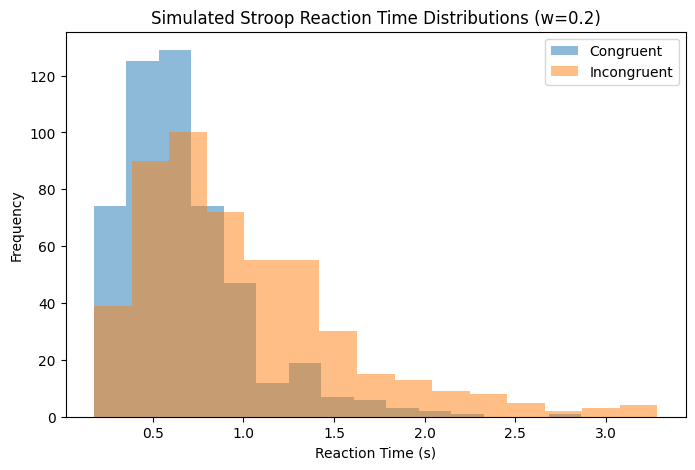

Plot saved to figures/rt_distributions_w0.2.png


In [6]:
for w, res in results.items():
    plt.figure(figsize=(8,5))
    
    # Plot congruent and incongruent RTs
    plt.hist(res['rt_cong'], bins=15, alpha=0.5, label='Congruent')
    plt.hist(res['rt_incong'], bins=15, alpha=0.5, label='Incongruent')
    
    plt.xlabel("Reaction Time (s)")
    plt.ylabel("Frequency")
    plt.title(f"Simulated Stroop Reaction Time Distributions (w={w})")
    plt.legend()
    
    # Save figure with w in filename
    plt.savefig(f'../figures/rt_distributions_w{w}.png')
    plt.show()
    print(f"Plot saved to figures/rt_distributions_w{w}.png")

In [7]:
# Extract mean RTs and error rates
word_weights = list(results.keys())
rt_cong_means = []
rt_incong_means = []

for w in word_weights:
    res = results[w]
    rt_cong_means.append(res['rt_cong'].mean())    # mean of 500 trials
    rt_incong_means.append(res['rt_incong'].mean())
    
err_cong = []
err_incong = []
for w in word_weights:
    res = results[w]
    err_cong.append(res['rt_cong'].mean())    # mean of 500 trials
    err_incong.append(res['rt_incong'].mean())
err_cong = [results[w]['err_cong'] for w in word_weights]
err_incong = [results[w]['err_incong'] for w in word_weights]

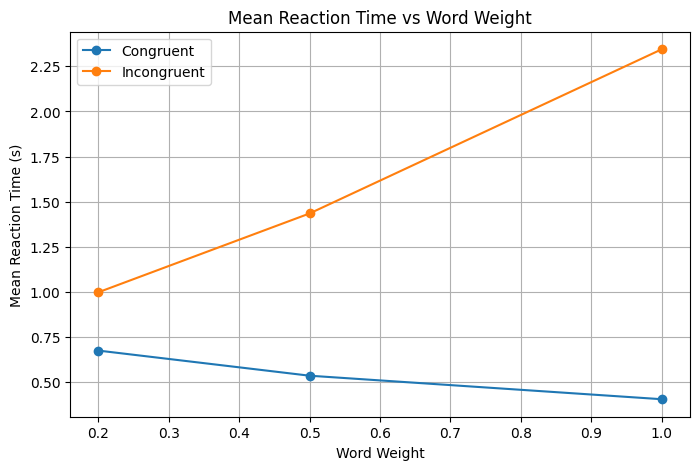

Plot saved to figures/Mean_Reaction_VS_Word_Weight.png


In [8]:
plt.figure(figsize=(8, 5))
plt.plot(word_weights, rt_cong_means, marker='o', label='Congruent')
plt.plot(word_weights, rt_incong_means, marker='o', label='Incongruent')
plt.xlabel('Word Weight')
plt.ylabel('Mean Reaction Time (s)')
plt.title('Mean Reaction Time vs Word Weight')
#plt.gca().invert_xaxis()  # optional
plt.legend()
plt.grid(True)
plt.savefig('../figures/Mean_Reaction_VS_Word_Weight.png')
plt.show()
print("Plot saved to figures/Mean_Reaction_VS_Word_Weight.png")

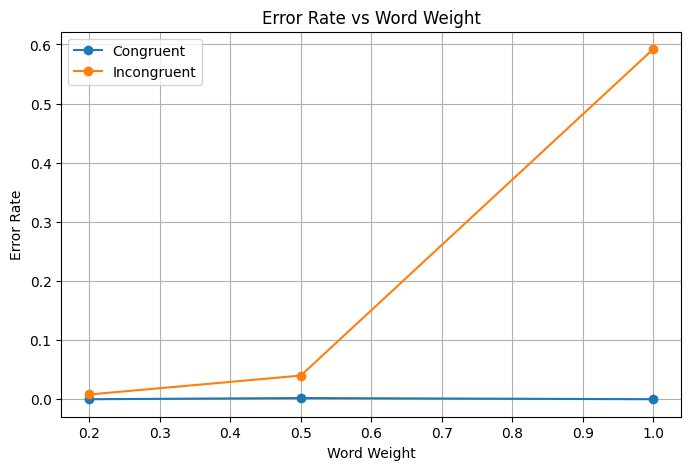

Plot saved to figures/Error_Rate_VS_Word_Weight.png


In [9]:
plt.figure(figsize=(8, 5))
plt.plot(word_weights, err_cong, marker='o', label='Congruent')
plt.plot(word_weights, err_incong, marker='o', label='Incongruent')
plt.xlabel('Word Weight')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Word Weight')
#plt.gca().invert_xaxis()  # optional
plt.legend()
plt.grid(True)
plt.savefig('../figures/Error_Rate_VS_Word_Weight.png')
plt.show()
print("Plot saved to figures/Error_Rate_VS_Word_Weight.png")